In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
bank_data = pd.read_csv('bank_data.csv')

In [15]:
bank_data.head()

,age,job,martial,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [3]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   martial    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
label_encoder = preprocessing.LabelEncoder()
bank_data['y'] = label_encoder.fit_transform(bank_data['y'])
bank_data.head()

,age,job,martial,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [5]:
bank_data = pd.get_dummies(bank_data)
bank_data.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [19]:
X= bank_data.iloc[:,1:]
Y= bank_data.iloc[:,17]

In [21]:
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [22]:
y_pred = classifier.predict(X)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=uint8)

In [23]:
y_pred_df = pd.DataFrame({'actual' : Y,'predicted': classifier.predict(X)})

In [24]:
y_pred_df[1:50]

,actual,predicted
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,0,0
7,0,0
8,0,0
9,1,1
10,0,0


In [26]:
y_pred_df['correct'] = y_pred_df['actual'] == y_pred_df['predicted']

y_pred_df['correct'].mean()

0.987923293003915

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y,y_pred)
print(confusion_matrix)

[[37512   102]
 [  444  7153]]


In [29]:
# Inference: The Diagonal value(39172 TP,1140 TN, 750 FP,4149 FN) are the Correctly Predicted Values i.e TP, TN
# Calculating the accuracy of the model:
# TP + TN / TP + FP + FN + TN
Accuracy = (37512+7153)/(37512+102+444+7153)
print(Accuracy)

0.987923293003915


In [30]:
#Inference: The Final Accuracy of the Model is 90.35

In [31]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     37614
           1       0.99      0.94      0.96      7597

    accuracy                           0.99     45211
   macro avg       0.99      0.97      0.98     45211
weighted avg       0.99      0.99      0.99     45211



Text(0, 0.5, 'True Postive Rate')

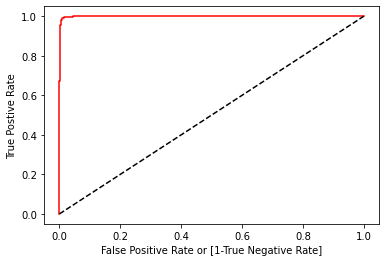

In [32]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr,tpr,thresholds = roc_curve(Y,classifier.predict_proba(X)[:,1])

auc = roc_auc_score(Y,y_pred)

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,color='red', label='logit model(area = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1-True Negative Rate]')
plt.ylabel('True Postive Rate')


In [33]:
auc

0.969422060529514

#### 